In [1]:
#Import of used Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import csv
import matplotlib.ticker as mt

In [2]:
#read each file of participants
person1 = pd.read_csv("../UE_Motion_Capture/data_export/walking_music_P1_pos.tsv",delimiter="\t",usecols=["RHeel_pos_Z","LHeel_pos_Z"])
person2 = pd.read_csv("../UE_Motion_Capture/data_export/walking_music_P2_pos.tsv",delimiter="\t",usecols=["RHeel_pos_Z","LHeel_pos_Z"])
person3 = pd.read_csv("../UE_Motion_Capture/data_export/walking_music_P3_pos.tsv",delimiter="\t",usecols=["RHeel_pos_Z","LHeel_pos_Z"])
person4 = pd.read_csv("../UE_Motion_Capture/data_export/walking_music_P4_pos.tsv",delimiter="\t",usecols=["RHeel_pos_Z","LHeel_pos_Z"])
person5 = pd.read_csv("../UE_Motion_Capture/data_export/walking_music_P5_pos.tsv",delimiter="\t",usecols=["RHeel_pos_Z","LHeel_pos_Z"])
person6 = pd.read_csv("../UE_Motion_Capture/data_export/walking_music_P6_pos.tsv",delimiter="\t",usecols=["RHeel_pos_Z","LHeel_pos_Z"])
person7 = pd.read_csv("../UE_Motion_Capture/data_export/walking_music_P7_pos.tsv",delimiter="\t",usecols=["RHeel_pos_Z","LHeel_pos_Z"])

In [3]:
#Range of Z-limits for steps (visualisation)
P1_Zlimits = [40, 70]
P2_Zlimits = [30, 60]
P3_Zlimits = [5, 35]
P4_Zlimits = [45, 70]
P5_Zlimits = [40, 80]
P6_Zlimits = [35, 65]
P7_Zlimits = [30, 70]

In [4]:
#change values here for different persons
person = person7
strPerson = "P7"
ZLimits = P7_Zlimits

{'whiskers': [<matplotlib.lines.Line2D at 0x2670f936550>,
 'caps': [<matplotlib.lines.Line2D at 0x2670f937dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2670f8fcc50>],
 'medians': [<matplotlib.lines.Line2D at 0x2670f945550>],
 'fliers': [<matplotlib.lines.Line2D at 0x2670f946090>],
 'means': []}

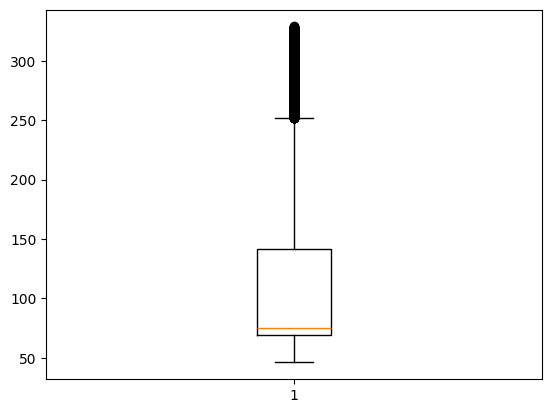

In [5]:
plt.boxplot(person["RHeel_pos_Z"])

In [6]:
#Calculation of right foot steps
Rsteps = []
frame = 0
bValley = False
if strPerson == "P5":
    maxValue = 80
    maxRange = 50
else:
    maxValue = 70
    maxRange = 80
for index, values in person.iterrows():
    try:
        RValue = values["RHeel_pos_Z"]
        if frame < 150:
            frame += 1
            continue
        if RValue < maxValue:
            bValley = False
            for i in range(1,maxRange):
                before = person.loc[frame-i,"RHeel_pos_Z"]
                next = person.loc[frame+i,"RHeel_pos_Z"]
                if (RValue <= before) and (RValue <= next):
                    bValley = True
                else:
                    bValley = False
                    break
            if bValley:
                print("R - ", frame, ": ", RValue)
                Rsteps.append([frame,RValue])
        frame += 1
    except:
        pass

R -  249 :  53.784
R -  372 :  53.94
R -  492 :  49.894
R -  615 :  49.905
R -  734 :  54.369
R -  850 :  57.147
R -  974 :  60.318
R -  1096 :  59.465
R -  1224 :  58.392
R -  1350 :  52.993
R -  1475 :  53.897
R -  1600 :  53.499
R -  1723 :  49.839
R -  1851 :  56.165
R -  1972 :  58.511
R -  2096 :  60.591
R -  2214 :  59.98
R -  2335 :  59.045
R -  2455 :  51.756
R -  2606 :  54.813
R -  2757 :  52.207
R -  2893 :  48.187
R -  3030 :  52.795
R -  3168 :  57.15
R -  3305 :  61.023
R -  3441 :  59.497
R -  3576 :  57.778
R -  3712 :  54.772
R -  3844 :  50.397
R -  3980 :  53.437
R -  4114 :  49.618
R -  4250 :  51.092
R -  4384 :  55.784
R -  4524 :  59.062
R -  4661 :  60.635
R -  4788 :  60.909
R -  4912 :  58.844
R -  5036 :  52.082
R -  5164 :  58.125
R -  5301 :  52.387
R -  5449 :  51.688
R -  5598 :  52.719
R -  5745 :  57.053
R -  5893 :  60.05
R -  6046 :  59.759
R -  6192 :  59.327
R -  6342 :  59.038
R -  6489 :  56.291
R -  6639 :  52.816
R -  6791 :  54.517
R -  6932 :

In [7]:
#Calculation of left foot steps
LSteps = []
frame = 0
if strPerson == "P5":
    maxValue = 80
    maxRange = 50
else:
    maxValue = 70
    maxRange = 80
for index, values in person.iterrows():
    try:
        LValue = values["LHeel_pos_Z"]
        if frame < 150:
            frame += 1
            continue
        if LValue < maxValue:
            for i in range(1,maxRange):
                before = person.loc[frame-i,"LHeel_pos_Z"]
                next = person.loc[frame+i,"LHeel_pos_Z"]
                if (LValue <= before) and (LValue <= next):
                    bValley = True
                else:
                    bValley = False
                    break
            if bValley:
                print("L - ", frame, ": ", LValue)
                LSteps.append([frame,LValue])
        frame += 1
    except:
        pass

L -  215 :  60.239
L -  311 :  42.404
L -  432 :  44.354
L -  554 :  41.194
L -  673 :  44.733
L -  791 :  50.795
L -  912 :  53.342
L -  1035 :  52.216
L -  1160 :  49.808
L -  1285 :  46.777
L -  1410 :  41.784
L -  1537 :  45.389
L -  1661 :  41.338
L -  1786 :  45.349
L -  1910 :  51.641
L -  2033 :  53.463
L -  2155 :  53.258
L -  2272 :  51.928
L -  2395 :  47.095
L -  2519 :  40.722
L -  2690 :  45.026
L -  2823 :  41.284
L -  2964 :  43.901
L -  3098 :  47.95
L -  3239 :  51.368
L -  3373 :  54.039
L -  3509 :  50.838
L -  3644 :  48.875
L -  3779 :  44.212
L -  3913 :  42.731
L -  4049 :  42.933
L -  4182 :  38.514
L -  4318 :  44.738
L -  4452 :  49.488
L -  4595 :  53.151
L -  4726 :  52.238
L -  4850 :  51.609
L -  4973 :  45.949
L -  5094 :  40.908
L -  5223 :  46.609
L -  5376 :  43.37
L -  5523 :  40.832
L -  5672 :  49.241
L -  5819 :  52.161
L -  5969 :  54.062
L -  6119 :  51.682
L -  6270 :  51.503
L -  6415 :  48.705
L -  6563 :  44.973
L -  6716 :  45.796
L -  6866

In [8]:
#Combination of steps
steps = LSteps + Rsteps
steps.sort()

In [9]:
#Steps to Dataframe
steps = pd.DataFrame(steps)
steps

,0,1
0,215,60.239
1,249,53.784
2,311,42.404
3,372,53.940
4,432,44.354
...,...,...
138,9313,39.096
139,9378,46.085
140,9445,42.029
141,9511,51.880


In [10]:
#reading beat tracking of music clips
m1 = pd.read_csv("../UE_Motion_Capture/music/export_big_john.txt",delimiter="\t", header=None)
m2 = pd.read_csv("../UE_Motion_Capture/music/export_berlioz.txt",delimiter="\t", header=None)
m3 = pd.read_csv("../UE_Motion_Capture/music/export_wombats.txt",delimiter="\t", header=None)

In [11]:
#delete first row
m1 = m1.drop(index=0)
m2 = m2.drop(index=0)
m3 = m3.drop(index=0)

In [12]:
#reading file with starting frames of music
start_music = pd.read_csv("../UE_Motion_Capture/start_of_music.csv",delimiter="\t", header=None)

In [13]:
#music start of person
strPersonM1 = strPerson + "_M1"
strPersonM2 = strPerson + "_M2"
strPersonM3 = strPerson + "_M3"

In [14]:
#Update Time Values, to frames, to starting_time 
m1[0] = (m1[0]*100)+float(start_music[start_music[0]==strPersonM1][1].item())
m2[0] = (m2[0]*100)+float(start_music[start_music[0]==strPersonM2][1].item())
m3[0] = (m3[0]*100)+float(start_music[start_music[0]==strPersonM3][1].item())

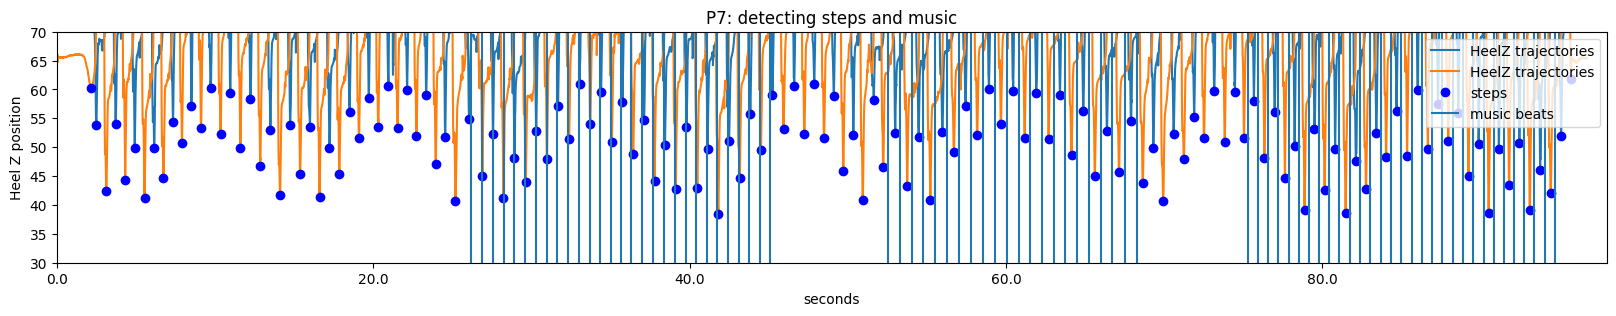

In [15]:
#Overview plot of step calculating and music beats
plt.figure(figsize=(20,3))
plt.plot(person,label="HeelZ trajectories")
plt.plot(steps[0],steps[1],'bo',label="steps")
plt.vlines(m1[0],0,500,label="music beats")
plt.vlines(m2[0],0,500)
plt.vlines(m3[0],0,500)
plt.ylim(ZLimits)
plt.xlim([0, 9800])
plt.subplot().get_xaxis().set_major_formatter(mt.FuncFormatter(lambda x, p: format(x/100)))

plt.title(strPerson + ": detecting steps and music")
plt.xlabel("seconds")
plt.ylabel("Heel Z position")
plt.legend(loc="upper right")
plt.savefig("../UE_Motion_Capture/pictures/"+strPerson+'_ALL.png')

In [16]:
#step intervall for m1
start = m1[0].min()
end = m1[0].max()

steps.loc[(steps[0] >= start) & (steps[0] <= end)].count()[0]/(((end-start)/100)/60)

85.65694060422244

In [17]:
#first 5 seconds
start = m1[0].min()
end = m1[0].min()+500

steps.loc[(steps[0] >= start) & (steps[0] <= end)].count()[0]/(((end-start)/100)/60)

84.0

# Person - M1

In [18]:
#start and end for M1
m1_start = start_music[start_music[0]==strPersonM1][1].item()
m1_end = start_music[start_music[0]==strPersonM2][1].item()-500
print(m1_start)
print(m1_end)

2470
4570


In [19]:
#calculating beats and steps for m1
beats_in_m1_range = m1[(m1[0]>=m1_start) & (m1[0]<=m1_end)][0] 
steps_in_m1_range = steps.loc[(steps[0] >= m1_start) & (steps[0] <= m1_end)][0]

In [20]:
#BPM Music M1
beats_in_m1_range.count()/((beats_in_m1_range.max()-beats_in_m1_range.min())/100)*60

92.00189916749818

In [21]:
#BPM Walking M1
steps_in_m1_range.count()/((m1_end-m1_start)/100)*60

85.71428571428572

In [22]:
#Steps Walking After 3 seconds
after3W = steps_in_m1_range[steps_in_m1_range >= steps_in_m1_range.min()+300]

In [23]:
#Beats music after 3 seconds
after3M = beats_in_m1_range[beats_in_m1_range >= beats_in_m1_range.min()+300]

In [24]:
#BPM Music after 3 seconds
after3M.count()/((after3M.max()-after3M.min())/100)*60

92.7683246045788

In [25]:
#BPM Walking after 3 seconds
after3W.count()/((after3W.max()-after3W.min())/100)*60

91.71075837742504

In [26]:
#Calculation of interstep intervall
lInterStepIntervall = [j-i for i, j in zip(steps_in_m1_range[:-1], steps_in_m1_range[1:])]
i=1
if i in lInterStepIntervall:
    lInterStepIntervall.remove(i)

In [27]:
#writing interstep intervall for M1 into txt file
with open(r"../UE_Motion_Capture/InterstepIntervals/" + strPerson + "_M1_InterstepInterval.txt", "w") as fp:
    for item in lInterStepIntervall:
        # write each item on a new line
        fp.write("%s\n" % item)

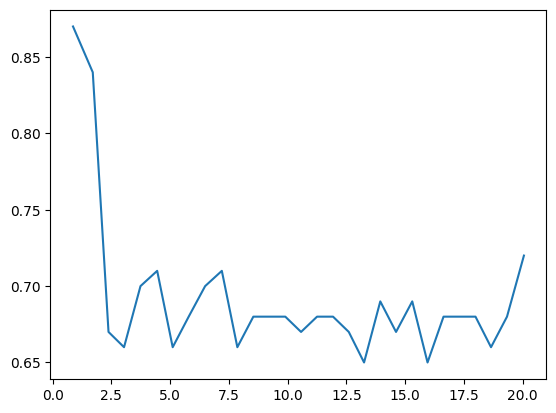

In [28]:
#Plot of Interstep Intervall
total = 0
lElemsX = []
lElemsY=[]
for i in range(0,len(lInterStepIntervall)):
    total+= lInterStepIntervall[i]
    lElemsX.append(total/100)
    lElemsY.append(lInterStepIntervall[i]/100)
    
plt.plot(lElemsX, lElemsY)

In [29]:
#Calculation of interbeat intervall
lInterBeatIntervall = [j-i for i, j in zip(beats_in_m1_range[:-1], beats_in_m1_range[1:])]

In [30]:
lInterBeatIntervall

[68.49886629999992,
 68.49886620000007,
 68.49886620000007,
 66.17687070000011,
 67.33786849999979,
 67.33786850000024,
 69.65986389999989,
 68.49886629999992,
 68.49886620000007,
 68.49886620000007,
 66.17687070000011,
 67.33786849999979,
 67.33786850000024,
 65.01587299999983,
 65.01587299999983,
 68.49886620000052,
 69.65986399999929,
 68.49886620000052,
 68.49886619999961,
 68.49886620000052,
 66.17687079999996,
 65.01587300000028,
 66.1768706999992,
 68.49886619999961,
 67.3378685000007,
 67.33786849999979,
 67.33786849999979,
 67.3378685000007]

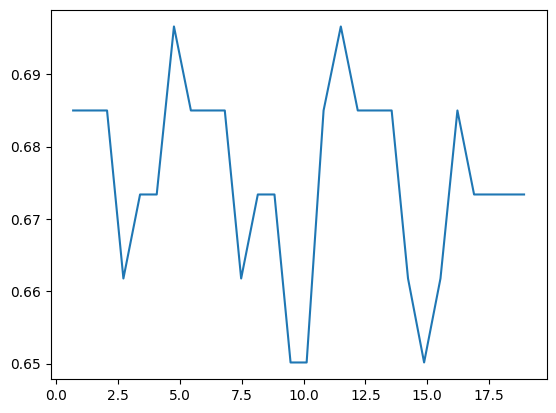

In [31]:
#Plot of interbeat intervall
total = 0
lElemsX = []
lElemsY=[]
for i in range(0,len(lInterBeatIntervall)):
    total+= lInterBeatIntervall[i]
    lElemsX.append(total/100)
    lElemsY.append(lInterBeatIntervall[i]/100)
    
plt.plot(lElemsX, lElemsY)

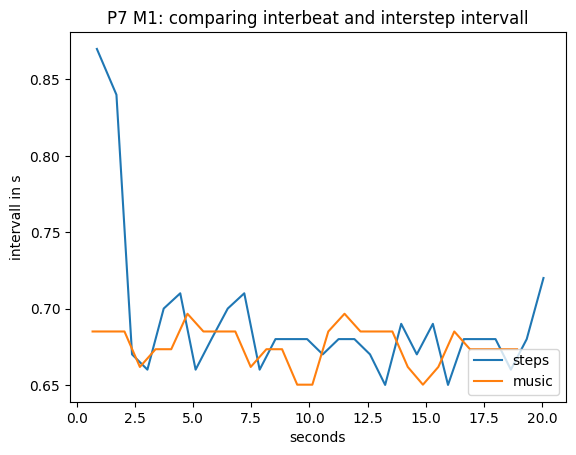

In [32]:
#Plotting interstep and interbeat intervall together
#Plot of Interstep Intervall
total = 0
lElemsX = []
lElemsY=[]
for i in range(0,len(lInterStepIntervall)):
    total+= lInterStepIntervall[i]
    lElemsX.append(total/100)
    lElemsY.append(lInterStepIntervall[i]/100)
plt.plot(lElemsX, lElemsY,label="steps")

#Plot of interbeat intervall
total = 0
lElemsX = []
lElemsY=[]
for i in range(0,len(lInterBeatIntervall)):
    total+= lInterBeatIntervall[i]
    lElemsX.append(total/100)
    lElemsY.append(lInterBeatIntervall[i]/100)
plt.plot(lElemsX, lElemsY,label="music")

plt.title(strPerson + " M1: comparing interbeat and interstep intervall")
plt.xlabel("seconds")
plt.ylabel("intervall in s")
plt.legend(loc="lower right")
plt.savefig("../UE_Motion_Capture/pictures/"+strPerson+'_M1_comparing_inter.png')

In [33]:
#Mean of interstep intervall
statistics.mean(lInterStepIntervall)

69.13793103448276

In [34]:
#mean of interbeat intervall
statistics.mean(lInterBeatIntervall)

67.54518950714287

In [35]:
#standarddeviation of interstep intervall
np.std(lInterStepIntervall)

4.775830947240812

In [36]:
##standard mean error for interstep intervall
from scipy.stats import sem
sem(lInterStepIntervall)

0.902547213577516

In [37]:
# create 90% confidence interval for insterstep intervall
import scipy.stats as st  
intervall = st.t.interval(0.90, df=len(lInterStepIntervall)-1, 
              loc=np.mean(lInterStepIntervall), 
              scale=st.sem(lInterStepIntervall))[1]-statistics.mean(lInterStepIntervall)
intervall


1.5353509846522257

In [38]:
#row for export
row = [strPerson,'M1',statistics.mean(lInterStepIntervall),statistics.mean(lInterBeatIntervall),np.std(lInterStepIntervall),sem(lInterStepIntervall),intervall]

In [39]:
#export of statistical key figures
# open the file in the append mode
with open('deviation.csv','a') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    writer.writerow(row)

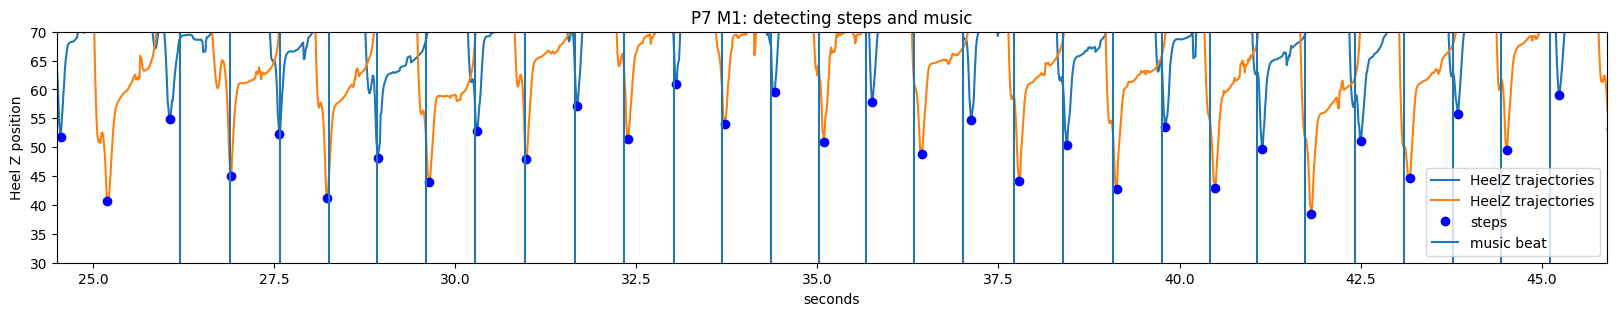

In [40]:
#M1 plot step calculating and music beat
plt.figure(figsize=(20,3))
plt.plot(person, label="HeelZ trajectories")
plt.plot(steps[0],steps[1],'bo',label="steps")
plt.vlines(m1[0],0,500, label = "music beat")
plt.ylim(ZLimits)
plt.xlim([m1_start-20, m1_end+20])
plt.subplot().get_xaxis().set_major_formatter(mt.FuncFormatter(lambda x, p: format(x/100)))

plt.title(strPerson + " M1: detecting steps and music")
plt.xlabel("seconds")
plt.ylabel("Heel Z position")
plt.legend(loc="lower right")
plt.savefig("../UE_Motion_Capture/pictures/"+strPerson+'_M1_steps_music.png')

# Person - M2

In [41]:
#start and end for M2
m2_start = start_music[start_music[0]==strPersonM2][1].item()
m2_end = start_music[start_music[0]==strPersonM3][1].item()-500
print(m2_start)
print(m2_end)

5070
6870


In [42]:
#calculating beats and steps for M2
beats_in_m2_range = m2[(m2[0]>=m2_start) & (m2[0]<=m2_end)][0] 
steps_in_m2_range = steps.loc[(steps[0] >= m2_start) & (steps[0] <= m2_end)][0]

In [43]:
#BPM Music M2
beats_in_m2_range.count()/((beats_in_m2_range.max()-beats_in_m2_range.min())/100/60)

83.90797970147102

In [44]:
#BPM Walking M2
steps_in_m2_range.count()/((m2_end-m2_start)/100)*60

83.33333333333333

In [45]:
#Steps Walking After 3 seconds
after3W = steps_in_m2_range[steps_in_m2_range >= steps_in_m2_range.min()+300]

In [46]:
#Beats music after 3 seconds
after3M = beats_in_m2_range[beats_in_m2_range >= beats_in_m2_range.min()+300]

In [47]:
#BPM Music after 3 seconds
after3M.count()/((after3M.max()-after3M.min())/100/60)

85.1312681660429

In [48]:
#BPM Walking after 3 seconds
after3W.count()/((after3W.max()-after3W.min())/100/60)

84.68595624558927

In [49]:
#Calculation of interstep intervall
lInterStepIntervall = [j-i for i, j in zip(steps_in_m2_range[:-1], steps_in_m2_range[1:])]

In [50]:
#writing interstep intervall for M2 into txt file
with open(r"../UE_Motion_Capture/InterstepIntervals/" + strPerson + "_M2_InterstepInterval.txt", "w") as fp:
    for item in lInterStepIntervall:
        # write each item on a new line
        fp.write("%s\n" % item)

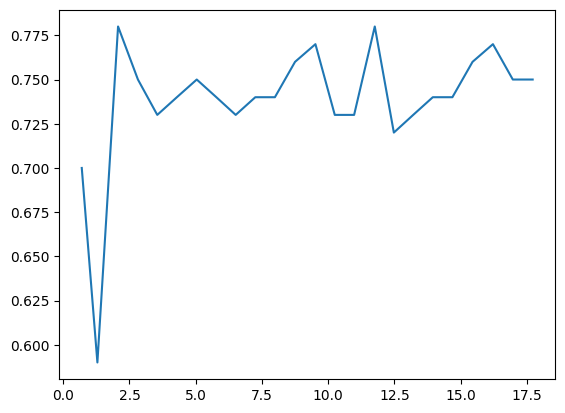

In [51]:
#Plot of Interstep Intervall
total = 0
lElemsX = []
lElemsY=[]
for i in range(0,len(lInterStepIntervall)):
    total+= lInterStepIntervall[i]
    lElemsX.append(total/100)
    lElemsY.append(lInterStepIntervall[i]/100)
    
plt.plot(lElemsX, lElemsY)

In [52]:
#Calculation of interbeat intervall
lInterBeatIntervall = [j-i for i, j in zip(beats_in_m2_range[:-1], beats_in_m2_range[1:])]

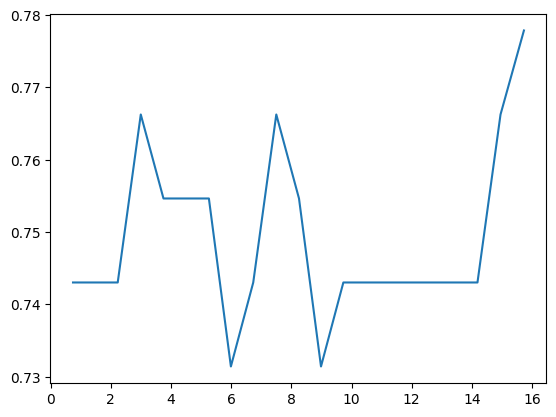

In [53]:
#Plot of interbeat intervall
total = 0
lElemsX = []
lElemsY=[]
for i in range(0,len(lInterBeatIntervall)):
    total+= lInterBeatIntervall[i]
    lElemsX.append(total/100)
    lElemsY.append(lInterBeatIntervall[i]/100)
    
plt.plot(lElemsX, lElemsY)

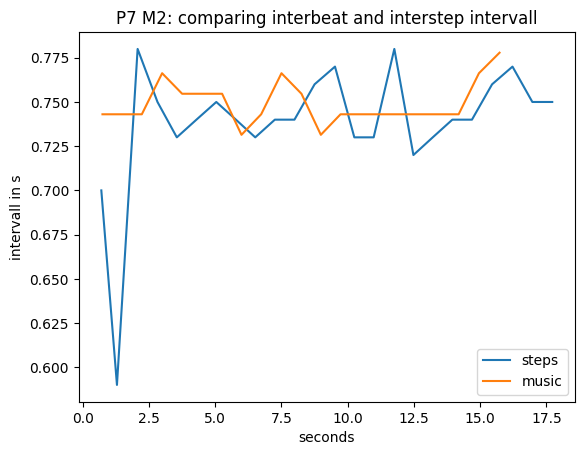

In [54]:
#Plotting interstep and interbeat intervall together
#Plot of Interstep Intervall
total = 0
lElemsX = []
lElemsY=[]
for i in range(0,len(lInterStepIntervall)):
    total+= lInterStepIntervall[i]
    lElemsX.append(total/100)
    lElemsY.append(lInterStepIntervall[i]/100)
plt.plot(lElemsX, lElemsY,label="steps")

#Plot of interbeat intervall
total = 0
lElemsX = []
lElemsY=[]
for i in range(0,len(lInterBeatIntervall)):
    total+= lInterBeatIntervall[i]
    lElemsX.append(total/100)
    lElemsY.append(lInterBeatIntervall[i]/100)
plt.plot(lElemsX, lElemsY,label="music")

plt.title(strPerson + " M2: comparing interbeat and interstep intervall")
plt.xlabel("seconds")
plt.ylabel("intervall in s")
plt.legend(loc="lower right")
plt.savefig("../UE_Motion_Capture/pictures/"+strPerson+'_M2_comparing_inter.png')

In [55]:
#Mean of interstep intervall
statistics.mean(lInterStepIntervall)

73.83333333333333

In [56]:
#mean of interbeat intervall
statistics.mean(lInterBeatIntervall)

74.91199654761905

In [57]:
#standarddeviation of interstep intervall
np.std(lInterStepIntervall)

3.6016971308290513

In [58]:
#standard mean error for interstep intervall
from scipy.stats import sem
sem(lInterStepIntervall)

0.751005766845867

In [59]:
# create 90% confidence interval for insterstep intervall
import scipy.stats as st
intervall = st.t.interval(0.90, df=len(lInterStepIntervall)-1, 
              loc=np.mean(lInterStepIntervall), 
              scale=st.sem(lInterStepIntervall))[1]-statistics.mean(lInterStepIntervall)
intervall


1.2871274009709737

In [60]:
#row for export
row = [strPerson,'M2',statistics.mean(lInterStepIntervall),statistics.mean(lInterBeatIntervall),np.std(lInterStepIntervall),sem(lInterStepIntervall),intervall]

In [61]:
#export of statistical key figures
# open the file in the append mode
with open('deviation.csv','a') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    writer.writerow(row)

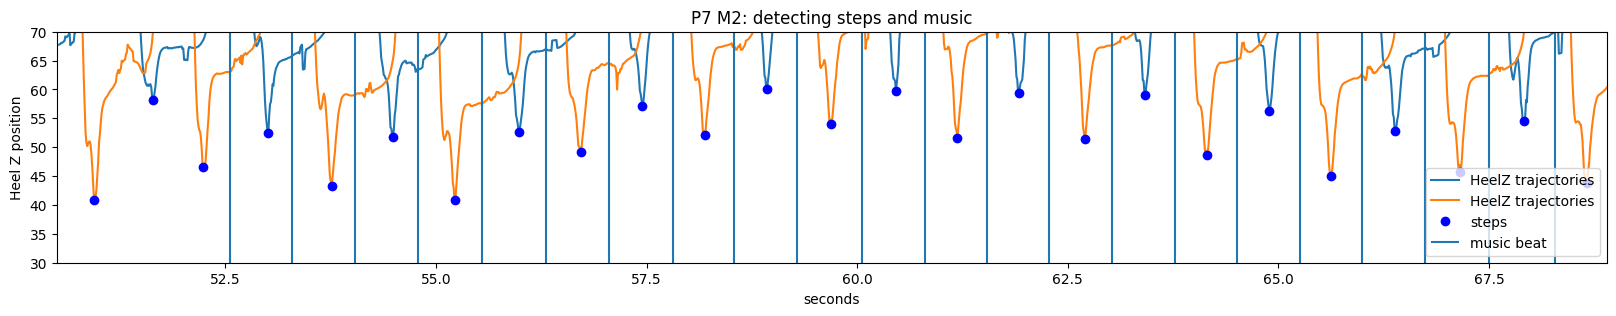

In [62]:
#M2 plot step calculating and music beat
plt.figure(figsize=(20,3))
plt.plot(person, label="HeelZ trajectories")
plt.plot(steps[0],steps[1],'bo',label="steps")
plt.vlines(m2[0],0,500, label = "music beat")
plt.ylim(ZLimits)
plt.xlim([m2_start-20, m2_end+20])
plt.subplot().get_xaxis().set_major_formatter(mt.FuncFormatter(lambda x, p: format(x/100)))

plt.title(strPerson + " M2: detecting steps and music")
plt.xlabel("seconds")
plt.ylabel("Heel Z position")
plt.legend(loc="lower right")
plt.savefig("../UE_Motion_Capture/pictures/"+strPerson+'_M2_steps_music.png')

# Person - M3

In [63]:
#start and end for M3
m3_start = start_music[start_music[0]==strPersonM3][1].item()
m3_end = m3[0].max()
print(m3_start)
print(m3_end)

7370
9471.9863946


In [64]:
#calculating beats and steps for M3
beats_in_m3_range = m3[(m3[0]>=m3_start) & (m3[0]<=m3_end)][0] 
steps_in_m3_range = steps.loc[(steps[0] >= m3_start) & (steps[0] <= m3_end)][0]

In [65]:
#BPM Music M3
beats_in_m3_range.count()/((beats_in_m3_range.max()-beats_in_m3_range.min())/100/60)

95.70312499909551

In [66]:
#BPM Walking M3
steps_in_m3_range.count()/((m3_end-m3_start)/100/60)

94.19661350266666

In [67]:
#Steps Walking After 3 seconds
after3W = steps_in_m3_range[steps_in_m3_range >= steps_in_m3_range.min()+300]

In [68]:
#Beats music after 3 seconds
after3M = beats_in_m3_range[beats_in_m3_range >= beats_in_m3_range.min()+300]

In [69]:
#BPM Music after 3 seconds
after3M.count()/((after3M.max()-after3M.min())/100/60)

96.38966104748079

In [70]:
#BPM Walking after 3 seconds
after3W.count()/((after3W.max()-after3W.min())/100/60)

96.21993127147765

In [71]:
#Calculation of interstep intervall
lInterStepIntervall = [j-i for i, j in zip(steps_in_m3_range[:-1], steps_in_m3_range[1:])]

In [72]:
#writing interstep intervall for M3 into txt file
with open(r"../UE_Motion_Capture/InterstepIntervals/" + strPerson + "_M3_InterstepInterval.txt", "w") as fp:
    for item in lInterStepIntervall:
        # write each item on a new line
        fp.write("%s\n" % item)

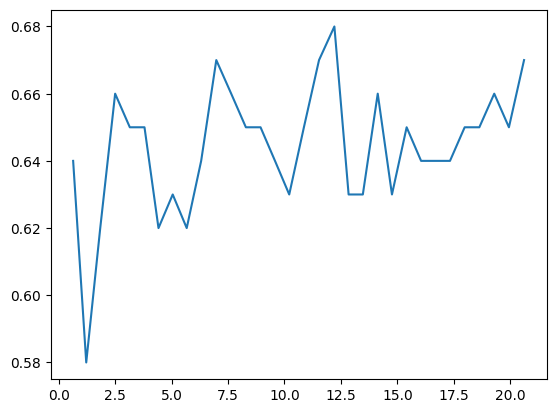

In [73]:
#Plot of Interstep Intervall
total = 0
lElemsX = []
lElemsY=[]
for i in range(0,len(lInterStepIntervall)):
    total+= lInterStepIntervall[i]
    lElemsX.append(total/100)
    lElemsY.append(lInterStepIntervall[i]/100)
    
plt.plot(lElemsX, lElemsY)

In [74]:
#Calculation of interbeat intervall
lInterBeatIntervall = [j-i for i, j in zip(beats_in_m3_range[:-1], beats_in_m3_range[1:])]

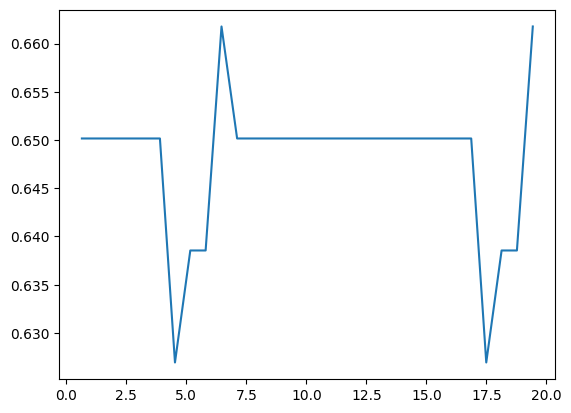

In [75]:
#Plot of interbeat intervall
total = 0
lElemsX = []
lElemsY=[]
for i in range(0,len(lInterBeatIntervall)):
    total+= lInterBeatIntervall[i]
    lElemsX.append(total/100)
    lElemsY.append(lInterBeatIntervall[i]/100)
    
plt.plot(lElemsX, lElemsY)

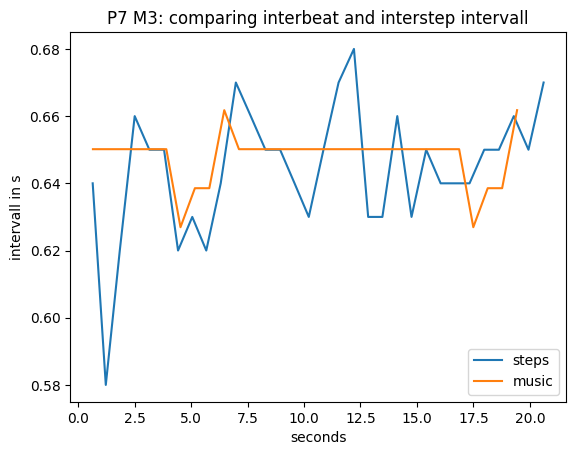

In [76]:
#Plotting interstep and interbeat intervall together
#Plot of Interstep Intervall
total = 0
lElemsX = []
lElemsY=[]
for i in range(0,len(lInterStepIntervall)):
    total+= lInterStepIntervall[i]
    lElemsX.append(total/100)
    lElemsY.append(lInterStepIntervall[i]/100)
plt.plot(lElemsX, lElemsY,label="steps")

#Plot of interbeat intervall
total = 0
lElemsX = []
lElemsY=[]
for i in range(0,len(lInterBeatIntervall)):
    total+= lInterBeatIntervall[i]
    lElemsX.append(total/100)
    lElemsY.append(lInterBeatIntervall[i]/100)
plt.plot(lElemsX, lElemsY,label="music")

plt.title(strPerson + " M3: comparing interbeat and interstep intervall")
plt.xlabel("seconds")
plt.ylabel("intervall in s")
plt.legend(loc="lower right")
plt.savefig("../UE_Motion_Capture/pictures/"+strPerson+'_M3_comparing_inter.png')

In [77]:
#Mean of interstep intervall
statistics.mean(lInterStepIntervall)

64.40625

In [78]:
#mean of interbeat intervall
statistics.mean(lInterBeatIntervall)

64.78367347000002

In [79]:
#standarddeviation of interstep intervall
np.std(lInterStepIntervall)

1.9016337548276745

In [80]:
#standard mean error for interstep intervall
from scipy.stats import sem
sem(lInterStepIntervall)

0.34154350488013446

In [81]:
# create 90% confidence interval for insterstep intervall
import scipy.stats as st
intervall = st.t.interval(0.90, df=len(lInterStepIntervall)-1, 
              loc=np.mean(lInterStepIntervall), 
              scale=st.sem(lInterStepIntervall))[1]-statistics.mean(lInterStepIntervall)
intervall


0.5790934298318575

In [82]:
#row for export
row = [strPerson,'M3',statistics.mean(lInterStepIntervall),statistics.mean(lInterBeatIntervall),np.std(lInterStepIntervall),sem(lInterStepIntervall),intervall]

In [83]:
#export of statistical key figures
# open the file in the append mode
with open('deviation.csv','a') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    writer.writerow(row)

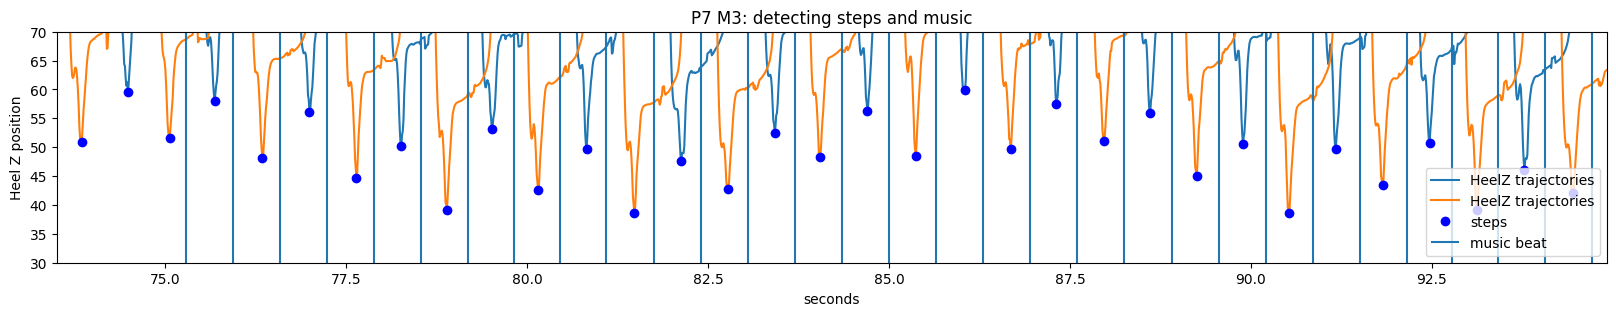

In [84]:
#M3 plot step calculating and music beat
plt.figure(figsize=(20,3))
plt.plot(person, label="HeelZ trajectories")
plt.plot(steps[0],steps[1],'bo',label="steps")
plt.vlines(m3[0],0,500, label = "music beat")
plt.ylim(ZLimits)
plt.xlim([m3_start-20, m3_end+20])
plt.subplot().get_xaxis().set_major_formatter(mt.FuncFormatter(lambda x, p: format(x/100)))

plt.title(strPerson + " M3: detecting steps and music")
plt.xlabel("seconds")
plt.ylabel("Heel Z position")
plt.legend(loc="lower right")
plt.savefig("../UE_Motion_Capture/pictures/"+strPerson+'_M3_steps_music.png')